In [ ]:
## Player Analytics
#Analysis of batting performance of virat including runs, dot balls, and strike rate. 


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


In [2]:
query = """
SELECT
    p.player_name,
    COUNT(*) AS balls,
    SUM(bd.runs_batter) AS runs,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 20
"""
df = pd.read_sql(query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_532\1638675889.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


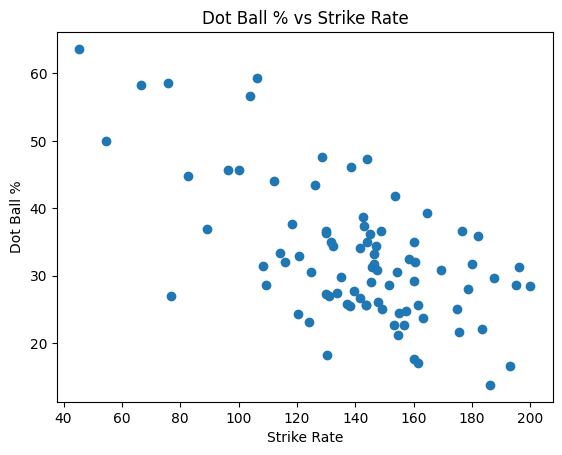

In [3]:
df["strike_rate"] = (df["runs"] / df["balls"]) * 100
df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100

plt.figure()
plt.scatter(df["strike_rate"], df["dot_ball_pct"])
plt.xlabel("Strike Rate")
plt.ylabel("Dot Ball %")
plt.title("Dot Ball % vs Strike Rate")
plt.show()


In [4]:
query = """
SELECT
    CASE
        WHEN over_number <= 6 THEN 'Powerplay'
        WHEN over_number BETWEEN 7 AND 15 THEN 'Middle'
        ELSE 'Death'
    END AS phase,
    SUM(runs_batter) AS runs
FROM ball_delivery
WHERE batter_id = 65
GROUP BY phase
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_532\198409013.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,phase,runs
0,Powerplay,140.0
1,Middle,105.0
2,Death,4.0


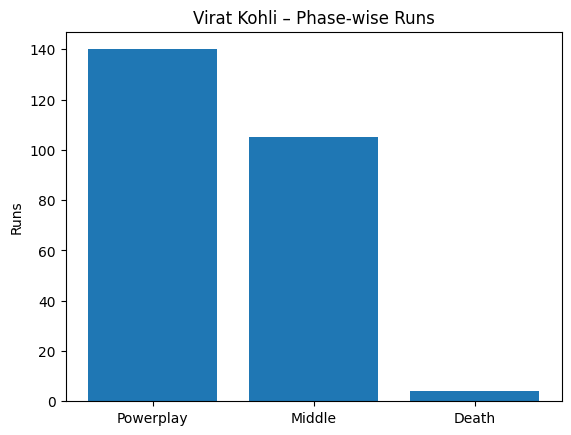

In [5]:
plt.figure()
plt.bar(df["phase"], df["runs"])
plt.ylabel("Runs")
plt.title("Virat Kohli – Phase-wise Runs")
plt.show()


In [6]:
query = """
SELECT
    CASE
        WHEN over_number <= 6 THEN 'Powerplay'
        WHEN over_number BETWEEN 7 AND 15 THEN 'Middle'
        ELSE 'Death'
    END AS phase,
    SUM(runs_batter) AS runs,
    COUNT(*) AS balls
FROM ball_delivery
WHERE batter_id = 65
GROUP BY phase
"""
df = pd.read_sql(query, conn)

df["strike_rate"] = (df["runs"] / df["balls"]) * 100
df


C:\Users\hp\AppData\Local\Temp\ipykernel_532\3060094187.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,phase,runs,balls,strike_rate
0,Powerplay,140.0,99,141.414141
1,Middle,105.0,78,134.615385
2,Death,4.0,3,133.333333


In [7]:
query = """
SELECT
    SUM(CASE WHEN is_four = 1 THEN 1 ELSE 0 END) AS fours,
    SUM(CASE WHEN is_six = 1 THEN 1 ELSE 0 END) AS sixes,
    COUNT(*) AS balls
FROM ball_delivery
WHERE batter_id = 65
"""
df = pd.read_sql(query, conn)

df["boundaries"] = df["fours"] + df["sixes"]
df["boundary_pct"] = (df["boundaries"] / df["balls"]) * 100
df


C:\Users\hp\AppData\Local\Temp\ipykernel_532\1862500388.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,fours,sixes,balls,boundaries,boundary_pct
0,20.0,10.0,180,30.0,16.666667
